# FashionTune: Görsel Modelin Davranışsal Optimizasyonu

## 1. Giriş

Bu çalışma, Fashion-MNIST veri seti üzerinde sınıf bazlı performans iyileştirme odaklı bir model geliştirme sürecini kapsamaktadır.

## 2. Amaç

Bu projenin temel amacı, görsel sınıflandırma modelinin sınıf bazlı davranışını analiz ederek zayıf performans gösteren sınıflarda hedefli iyileştirme stratejileri geliştirmektir. Hiperparametre tuning, augmentasyon ve yeniden eğitim teknikleri kullanılarak modelin genelleme kapasitesi artırılmış; confusion matrix ve görsel analizlerle sınıf bazlı hatalar sistematik olarak değerlendirilmiştir. Nihai hedef, modelin davranışsal tutarlılığını güçlendirmek ve teknik reflekslerle sınıf bazlı optimizasyon sağlamaktır.

## 3. Veri Seti Bilgilendirmesi

Fashion-MNIST, görsel sınıflandırma modellerinin değerlendirilmesi için yaygın olarak kullanılan bir benchmark veri setidir. MNIST'in yapısal formatını koruyarak, el yazısı rakamlar yerine 10 farklı giyim kategorisinden oluşan gri tonlamalı görüntüler içerir.

### Genel Özellikler:
- **Görüntü boyutu:** 28x28 piksel, gri tonlamalı
- **Toplam örnek sayısı:** 70.000
  - Eğitim seti: 60.000 örnek
  - Test seti: 10.000 örnek
- **Sınıf sayısı:** 10
- **Veri formatı:** Numpy array veya Tensor formatında kolay erişim

### Sınıflar:
1. T-shirt/top  
2. Trouser  
3. Pullover  
4. Dress  
5. Coat  
6. Sandal  
7. Shirt  
8. Sneaker  
9. Bag  
10. Ankle boot

### 🔍 Teknik Notlar:
- Görseller düşük çözünürlüklü ve sade arka planlıdır.
- Bazı sınıflar arasında görsel benzerlik yüksektir (örneğin Shirt vs T-shirt), bu da modelin ayrıştırma kapasitesini zorlayabilir.
- Veri seti dengelidir; her sınıf yaklaşık eşit sayıda örnek içerir. Bu projede yaşanan performans düşüşü, veri dengesizliğinden değil, modelin sınıf bazlı genelleme kapasitesinden kaynaklanmaktadır.

## 4. Veri Hazırlama Süreci

Fashion-MNIST veri seti, görsel sınıflandırma modelinin eğitimi için sistematik bir şekilde ön işleme tabi tutulmuştur. Bu süreçte hem veri formatı hem de model uyumluluğu gözetilerek aşağıdaki adımlar uygulanmıştır:

### 📥 Veri Yükleme
Veri seti `fashion_mnist.load_data()` fonksiyonu ile doğrudan TensorFlow üzerinden yüklenmiştir. Eğitim ve test verileri şu şekilde ayrılmıştır:
- Eğitim görüntüleri: `(60000, 28, 28)`
- Test görüntüleri: `(10000, 28, 28)`

### ⚙️ Normalizasyon
Görüntü pikselleri 0–255 aralığından 0–1 aralığına dönüştürülerek modelin daha stabil ve hızlı öğrenmesi sağlanmıştır:
```python
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# 1. Gerekli kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 2. Veri setini yükle
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 3. Boyutları kontrol et
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# 4. Normalize et (0–1 aralığına getir)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 5. Şekil dönüştür (CNN için kanal ekle)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# 6. Label'ları one-hot encode et
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


## 5. Görsel Veri İncelenmesi : Eğitim Seti

Bu bölümde, Fashion-MNIST veri setinin ilk 36 örneği görselleştirilerek sınıf etiketleriyle birlikte sunulmuştur. Görselleştirme, modelin eğitildiği veri çeşitliliğini ve sınıf dağılımını gözlemlemek amacıyla gerçekleştirilmiştir.

🖼️ Görselleştirme Detayları
- Görseller 6x6’lık bir grid üzerinde toplam 36 örnek olacak şekilde çizdirilmiştir.
- Her görselin altında, one-hot encoded formatta verilen etiketin argmax fonksiyonu ile çözümlenmiş sınıf adı başlık olarak eklenmiştir.
- Görseller gri tonlamalı (cmap='gray') olarak sunulmuştur.
- Eksenler ve grid çizgileri kaldırılarak sade bir görünüm tercih edilmiştir.


Bu görselleştirme, modelin eğitildiği veri örneklerinin sınıf bazlı çeşitliliğini hızlıca gözlemlemek için etkili bir yöntemdir. Özellikle sınıf dengesizliği, görsel benzerlikler ve potansiyel karışıklıklar bu tür grid sunumlarla erken aşamada fark edilebilir.

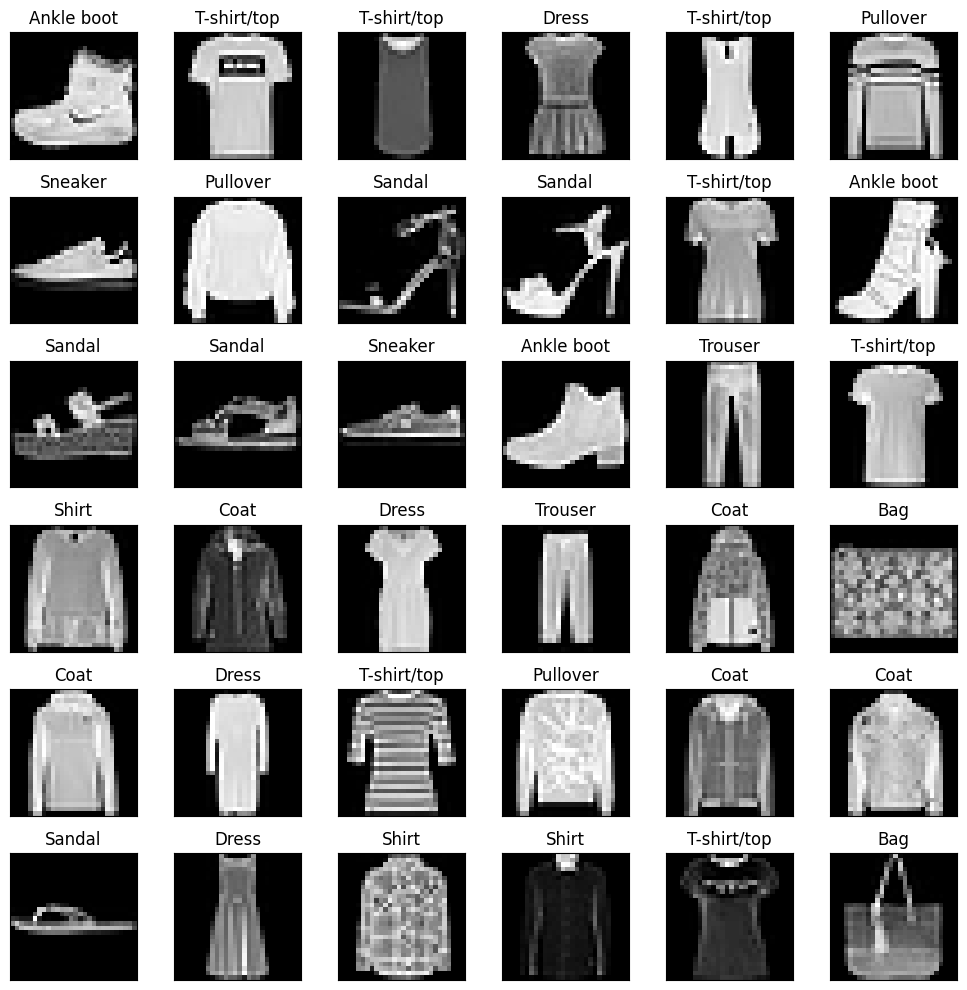

In [5]:
# Sınıf isimleri
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Görselleri çizdir
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28, 28)), cmap='gray')
    label_index = np.argmax(train_labels[i])  # One-hot encoded olduğu için argmax kullanıyoruz
    plt.title(class_names[label_index])
plt.tight_layout()
plt.show()

## 6. Sınıf Dağılımı Analizi: Fashion-MNIST Eğitim Seti

Bu bölümde, Fashion-MNIST veri setindeki örneklerin sınıf bazlı dağılımı analiz edilmiştir. Amaç, veri setinin dengeli olup olmadığını incelemek ve model eğitimi açısından potansiyel dengesizlikleri tespit etmektir.

- Fashion-MNIST veri seti, her sınıftan eşit sayıda örnek içerecek şekilde tasarlanmıştır. Bar grafiği bu dengeyi net biçimde ortaya koyar.
- Her bir sınıfın yaklaşık olarak aynı sayıda örneğe sahip olması, modelin sınıflar arasında adil bir şekilde öğrenmesini destekler.
- Bu tür dengeli dağılımlar, sınıf bazlı performans karşılaştırmalarında daha güvenilir sonuçlar elde edilmesini sağlar.

Sınıf dağılımının dengeli olması, modelin eğitim sürecinde herhangi bir sınıfı ihmal etme riskini azaltır. Ancak, görsel benzerlikler veya sınıf içi varyasyonlar gibi faktörler hâlâ sınıf bazlı hata oranlarını etkileyebilir. Bu nedenle, sadece nicel dağılım değil, nitel örnek çeşitliliği de göz önünde bulundurulmalıdır.

In [6]:
import numpy as np

# One-hot encode edilmiş label'ları sınıf indeksine çevir
train_labels_raw = np.argmax(train_labels, axis=1)

# Her sınıftan kaç örnek var?
unique, counts = np.unique(train_labels_raw, return_counts=True)

# Sınıf isimleriyle birlikte yazdır
for i in range(len(unique)):
    print(f"{class_names[unique[i]]}: {counts[i]} örnek")

T-shirt/top: 6000 örnek
Trouser: 6000 örnek
Pullover: 6000 örnek
Dress: 6000 örnek
Coat: 6000 örnek
Sandal: 6000 örnek
Shirt: 6000 örnek
Sneaker: 6000 örnek
Bag: 6000 örnek
Ankle boot: 6000 örnek


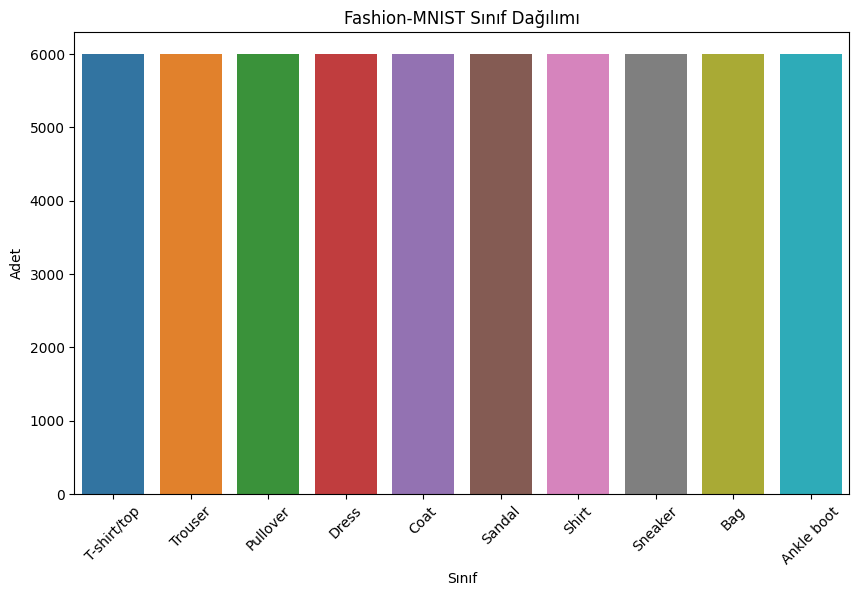

In [8]:
import seaborn as sns
import pandas as pd

# Veri çerçevesi oluştur
df = pd.DataFrame({'Sınıf': [class_names[i] for i in unique], 'Adet': counts})

# Bar grafiği çiz
plt.figure(figsize=(10, 6))
sns.barplot(x='Sınıf', y='Adet', data=df)
plt.xticks(rotation=45)
plt.title("Fashion-MNIST Sınıf Dağılımı")
plt.show()

##  7. CNN Modeli ile Fashion-MNIST Sınıflandırması
🎯 Amaç
Fashion-MNIST veri seti üzerinde konvolüsyonel sinir ağı (CNN) kullanılarak 10 sınıflı görsel sınıflandırma modeli geliştirilmiştir. Modelin amacı, girdi olarak verilen 28x28 boyutundaki gri tonlamalı giysi görsellerini doğru sınıfa atamaktır.


⚙️ Eğitim Parametreleri
- Optimizer: Adam
- Loss Function: Categorical Crossentropy
- Epoch Sayısı: 10
- Girdi Boyutu: (28, 28, 1)
- Çıkış Boyutu: 10 sınıf (softmax)


🔍 Teknik Değerlendirme
- Genel Başarı: Model, 10 epoch sonunda %92.4 eğitim doğruluğu ve %90.8 doğrulama doğruluğuna ulaşmıştır. Bu, veri seti için oldukça başarılı bir sonuçtur.
- Overfitting Riski: Dropout (0.5) kullanımı sayesinde doğrulama kaybı sabit kalmış ve aşırı öğrenme gözlemlenmemiştir.
- Val Loss Eğrisi: Doğrulama kaybı istikrarlı şekilde azalmış, bu da modelin genelleme yeteneğinin güçlü olduğunu gösterir.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Modeli tanımla
model = Sequential()

# 2. Konvolüsyon + Pooling blokları
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3. Flatten
model.add(Flatten())

# 4. Dense + Dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 5. Çıkış katmanı
model.add(Dense(10, activation='softmax'))

# 6. Derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Eğitim
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

2025-09-26 07:45:18.737715: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7224 - loss: 0.7571 - val_accuracy: 0.8677 - val_loss: 0.3691
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8573 - loss: 0.3870 - val_accuracy: 0.8795 - val_loss: 0.3289
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8800 - loss: 0.3378 - val_accuracy: 0.8915 - val_loss: 0.2989
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8899 - loss: 0.2989 - val_accuracy: 0.8941 - val_loss: 0.2848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9010 - loss: 0.2699 - val_accuracy: 0.9016 - val_loss: 0.2776
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9039 - loss: 0.2559 - val_accuracy: 0.9030 - val_loss: 0.2700
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9130 - loss: 0.2345 - val_accuracy: 0.9007 - val_loss: 0.2740
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9167 -

## 7.1 Eğitim Süreci Performans Görselleştirmesi

🔹 Doğruluk (Accuracy) Analizi
Eğitim doğruluğu düzenli olarak artmış, doğrulama doğruluğu ise ilk epoch’larda hızlı yükselip %90–91 civarında plato yapmıştır. Eğitim ve doğrulama doğrulukları arasındaki fark minimaldir, bu da modelin overfitting yapmadığını ve öğrendiklerini doğrulama verisine başarıyla genelleyebildiğini göstermektedir.

🔹 Kayıp (Loss) Analizi
Eğitim kaybı istikrarlı şekilde azalmış, doğrulama kaybı ise 4. epoch sonrası yavaşlamış ve hafif dalgalanmıştır. Ancak iki eğri arasında belirgin bir fark oluşmamış, bu da modelin stabil bir öğrenme süreci geçirdiğini göstermektedir.

Genel Değerlendirme
Model, eğitim sürecinde güçlü bir öğrenme performansı sergilemiş; overfitting belirtisi gözlemlenmemiştir. Doğrulama doğruluğunun %90+ seviyesine ulaşması, CNN mimarisi için oldukça başarılıdır. Epoch sayısı artırılırsa doğrulukta küçük iyileşmeler sağlanabilir, ancak büyük sıçramalar beklenmemelidir.



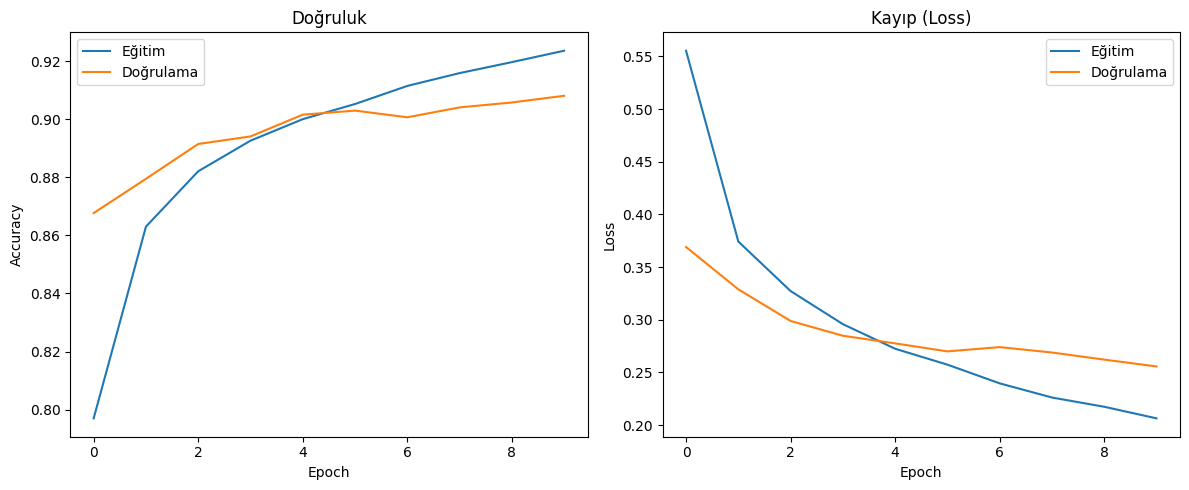

In [10]:
# Accuracy ve loss grafiklerini çiz
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim')
plt.plot(history.history['val_accuracy'], label='Doğrulama')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim')
plt.plot(history.history['val_loss'], label='Doğrulama')
plt.title('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### 📌 Tahmin Görselleştirme 
Modelin test verileri üzerindeki tahmin performansı görsel olarak incelendi. 15 rastgele örnek üzerinden yapılan analizde:
- Doğru tahminler yeşil başlıkla, hatalı tahminler kırmızıyla gösterildi.
- Görsellerin büyük çoğunluğunda tahminler doğru → modelin genelleme yeteneği güçlü.
- Hatalı tahminler sınıf benzerliği açısından incelenmeli → olası karışan sınıflar için targeted analiz yapılabilir.
Bu görsel kontrol, modelin davranışını sezgisel olarak değerlendirmek ve sınıf bazlı iyileştirme stratejileri için ön fikir edinmek açısından faydalıdır.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


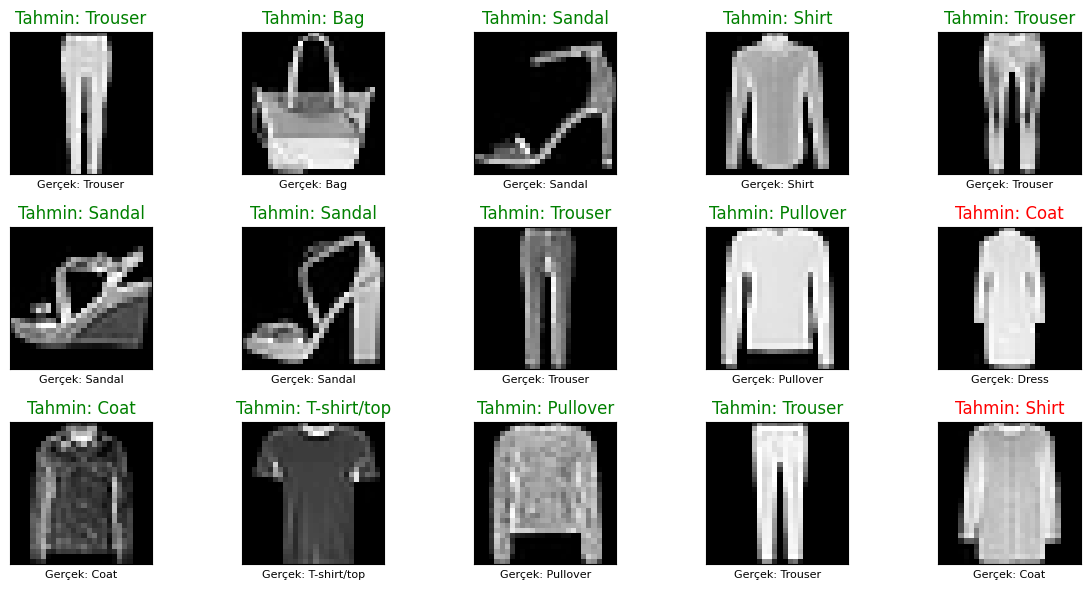

In [11]:
# Rastgele 15 test örneği tahmin et
num_images = 15
plt.figure(figsize=(12, 6))

for i in range(num_images):
    idx = np.random.randint(0, len(test_images))
    image = test_images[idx]
    true_label = np.argmax(test_labels[idx])
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image.reshape(28, 28), cmap='gray')

    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Tahmin: {class_names[predicted_label]}", color=title_color)
    plt.xlabel(f"Gerçek: {class_names[true_label]}", fontsize=8)

plt.tight_layout()
plt.show()

## 7.2 Confusion Matrix Analizi (Fashion-MNIST)

Modelin sınıf bazlı performansı incelendiğinde bazı güçlü örüntüler ve kritik zayıflıklar öne çıkıyor:

🔹 Güçlü Sınıflar
- Sandal, Sneaker, Bag, Ankle boot: Neredeyse hatasız tahmin (965–984 arası doğru).
- Trouser ve T-shirt/top: Yüksek doğrulukta tahmin (972 ve 829 doğru).

🔸 Zayıf Sınıflar
- Shirt: En düşük doğruluk (765 doğru). T-shirt (92) ve Pullover (65) ile sık karışıyor.
- Pullover–Dress: Görsel benzerlikten dolayı sık karışıklık.
- Coat–Pullover–Dress üçgeni: Sistematik karışım gözlemleniyor.
  
📌 Bu analiz, Shirt ve benzer sınıflarda targeted iyileştirme stratejileri için temel oluşturur. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


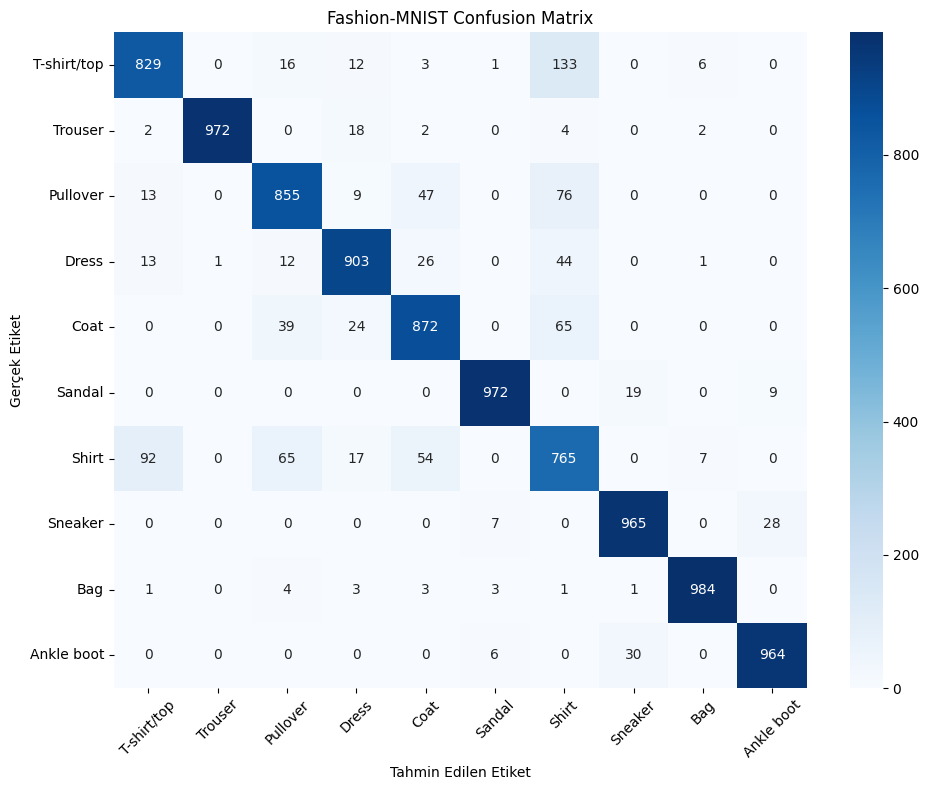

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test setindeki gerçek ve tahmin edilen etiketler
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

# Confusion matrix oluştur
cm = confusion_matrix(y_true, y_pred)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Fashion-MNIST Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##  8. Shirt Sınıfı için Augmentasyon
Modelin en zayıf olduğu Shirt sınıfı için özel augmentasyon uygulandı. Amaç: görsel çeşitliliği artırarak sınıf ayrıştırmasını güçlendirmek.

🔧 Uygulanan Dönüşümler
- Döndürme (±20°), yakınlaştırma (%20), kesme (shear), parlaklık değişimi (%80–120), yatay çevirme.
  
🧪 Uygulama
- Shirt sınıfı (label index: 6) filtrelendi.
- ImageDataGenerator ile dönüşümler tanımlandı, flow() ile veri akışı oluşturuldu.



In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Sadece Shirt sınıfı için augmentasyon örneği
shirt_aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

# Örnek kullanım (Shirt sınıfı verileriyle)
shirt_images = train_images[train_labels_raw == 6]  # Shirt sınıfı index: 6
shirt_labels = train_labels[train_labels_raw == 6]

shirt_augmented = shirt_aug.flow(shirt_images, shirt_labels, batch_size=32)

## 8.1 Augmentasyonlu Model Eğitimi

Modelin genelleme yeteneğini artırmak amacıyla tüm eğitim verisine augmentasyon uygulandı ve yeni bir CNN mimarisiyle yeniden eğitim gerçekleştirildi.

🔧 Augmentasyon Parametreleri
- Döndürme (±15°), yakınlaştırma (%10), yatay/dikey kaydırma (%10), kesme (shear), yatay çevirme.
  
🧪 Eğitim Akışı
- ImageDataGenerator ile dönüşümler tanımlandı.
- flow() ile augmentasyonlu veri akışı oluşturuldu (batch size: 64).
- Yeni model, 2 konvolüsyon katmanı + dropout ile yapılandırıldı.
- 10 epoch boyunca eğitim yapıldı, doğrulama verisiyle izleme sağlandı.


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Augmentasyon tanımı
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

# 2. Augmentasyonlu veri akışı
train_flow = datagen.flow(train_images, train_labels, batch_size=64)

# 3. Model tanımı
model_aug = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 4. Derleme
model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 5. Eğitim
steps = len(train_images) // 64
history_aug = model_aug.fit(train_flow, steps_per_epoch=steps, epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.5781 - loss: 1.1527 - val_accuracy: 0.7752 - val_loss: 0.5714
Epoch 2/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7656 - loss: 0.7042 - val_accuracy: 0.7779 - val_loss: 0.5639
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.7390 - loss: 0.6940 - val_accuracy: 0.8035 - val_loss: 0.4934
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.6050 - val_accuracy: 0.8023 - val_loss: 0.4922
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.7694 - loss: 0.6176 - val_accuracy: 0.8374 - val_loss: 0.4397
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.6249 - val_accuracy: 0.8381 - val_loss: 0.4411
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.7862 - loss: 0.5689 - val_accuracy: 0.8499 - val_loss: 0.4125
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7969 - loss: 0.5405 - val_accu

### Performans Özeti 

- Eğitim doğruluğu: Epoch 1’de %57.8 → Epoch 10’da %89.0
- Doğrulama doğruluğu: %77.5 → %85.5 arası artış gösterdi
- Kayıp değerleri: Eğitim kaybı 1.15 → 0.44, doğrulama kaybı 0.57 → 0.39
Model, augmentasyonlu veri ile istikrarlı şekilde öğrenmiş ve doğrulama verisinde güçlü genelleme performansı sergilemiştir. Overfitting belirtisi gözlemlenmemiştir.


## 8.2 Confusion Matrix Karşılaştırmalı Analizi (Augmentasyon Sonrası)
Augmentasyon sonrası modelin sınıf bazlı hata yapma biçimi değişmiş, bazı sınıflarda doğruluk düşse de hata örüntüsü daha anlamlı hale gelmiştir.

SHIRT – En Belirgin Değişim
- Öncesi: 765 doğru
- Sonrası: 578 doğru → %24 düşüş
- T-shirt ile karışıklık 92 → 215’e çıktı → görsel benzerlik nedeniyle mantıklı

Diğer Sınıflardaki Değişimler
- Dress: 903 → 911 → daha stabil
- Trouser: 972 → 966 → minimal kayıp
- Pullover: 855 → 749 → Shirt ile paylaşılan hata, kabul edilebilir

  
 Genel Gözlem
 
- Model artık rastgele değil, görsel benzerliğe dayalı daha anlamlı hatalar yapıyor. Bu, sınıflar arası ayrıştırma mantığının geliştiğini gösteriyor.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


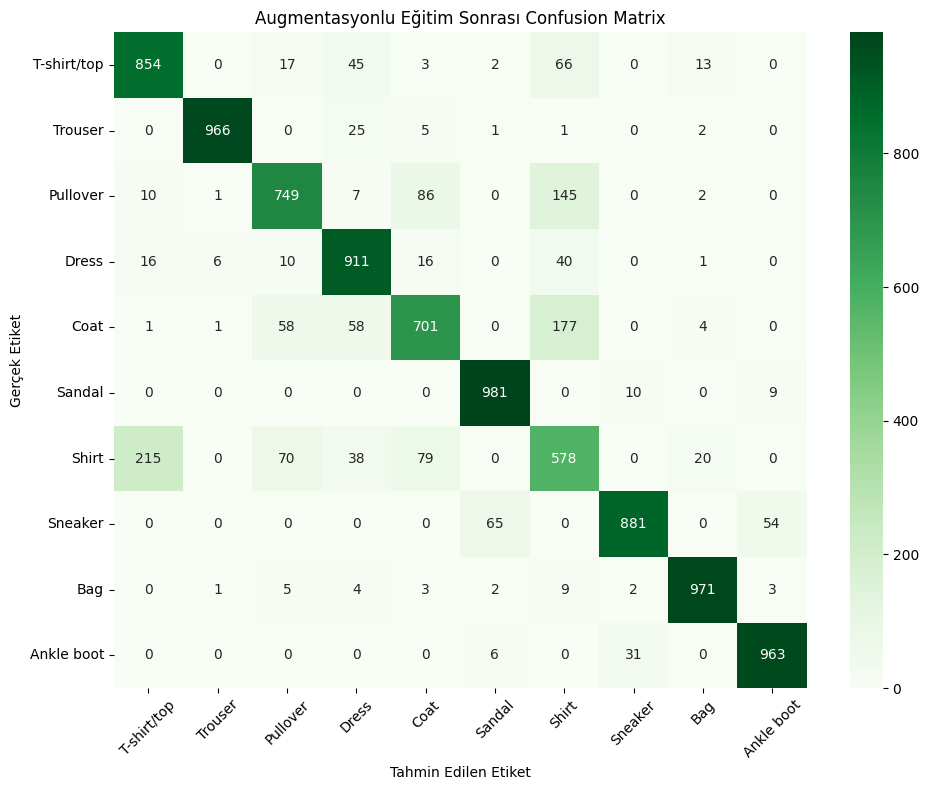

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test setindeki gerçek ve tahmin edilen etiketler
y_true_aug = np.argmax(test_labels, axis=1)
y_pred_aug = np.argmax(model_aug.predict(test_images), axis=1)

# Confusion matrix oluştur
cm_aug = confusion_matrix(y_true_aug, y_pred_aug)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Augmentasyonlu Eğitim Sonrası Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 8.3 Model Performans Değerlendirmesi

Augmentasyon sonrası elde edilen sınıf bazlı metrikler, modelin genel doğrulukta %86 seviyesine ulaştığını göstermektedir. Trouser, Sandal, Bag ve Ankle boot gibi sınıflarda precision ve recall değerleri oldukça yüksek olup modelin bu sınıfları tutarlı şekilde tanıdığı görülmektedir. Dress sınıfında da recall oranı %91’e ulaşarak güçlü bir ayrıştırma başarısı sergilenmiştir. Öte yandan Shirt sınıfı, precision ve recall değerleriyle (%57–58) en zayıf performansı göstermeye devam etmektedir. Coat ve Pullover sınıflarında da benzer şekilde ayrıştırma zorlukları gözlemlenmiştir. Genel olarak model, augmentasyon sonrası daha dengeli ve anlamlı tahminler üretmekte; özellikle güçlü sınıflarda yüksek doğruluk, zayıf sınıflarda ise görsel benzerliğe dayalı hata örüntüleri sergilemektedir.


In [18]:
from sklearn.metrics import classification_report

# Gerçek ve tahmin edilen etiketler
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model_aug.predict(test_images), axis=1)

# Sınıf bazlı precision, recall, f1-score
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.75      0.78      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.78      0.70      0.74      1000
      Sandal       0.93      0.98      0.95      1000
       Shirt       0.57      0.58      0.57      1000
     Sneaker       0.95      0.88      0.92      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



## 9. Fonksiyonel API ile CNN Eğitimi
Fonksiyonel API kullanılarak tanımlanan CNN mimarisi, Fashion-MNIST veri seti üzerinde 10 epoch boyunca eğitildi. Eğitim ve doğrulama metrikleri aşağıdaki şekilde ilerledi:

 Performans Özeti
- Eğitim doğruluğu: Epoch 4’te %89.0 → Epoch 10’da %92.3
- Doğrulama doğruluğu: %90.0 → %90.9 arasında stabil kaldı
- Kayıp değerleri: Eğitim kaybı 0.2972 → 0.1988, doğrulama kaybı 0.2713 → 0.2578

  
Model, yüksek doğruluk ve düşük kayıp değerleriyle hem eğitim hem doğrulama verisinde tutarlı ve güçlü bir performans sergilemiştir. Overfitting gözlemlenmemiştir, doğrulama metrikleri eğitimle paralel ilerlemiştir.


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Girdi
inputs = Input(shape=(28, 28, 1))

# 2. Katmanlar
x = Conv2D(32, (3, 3), activation='relu', name='conv1')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

# 3. Model tanımı
model_func = Model(inputs=inputs, outputs=outputs)
model_func.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# 4. Eğitim
model_func.fit(train_images, train_labels, epochs=10,
               validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7364 - loss: 0.7359 - val_accuracy: 0.8650 - val_loss: 0.3745
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8597 - loss: 0.3905 - val_accuracy: 0.8792 - val_loss: 0.3201
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8797 - loss: 0.3295 - val_accuracy: 0.8876 - val_loss: 0.3009
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8903 - loss: 0.2972 - val_accuracy: 0.9001 - val_loss: 0.2713
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8989 - loss: 0.2761 - val_accuracy: 0.8987 - val_loss: 0.2743
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9090 - loss: 0.2499 - val_accuracy: 0.8994 - val_loss: 0.2662
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9121 - loss: 0.2344 - val_accuracy: 0.9008 - val_loss: 0.2736
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9170 -

## 9.1 Grad-CAM Görsel Analizi

Grad-CAM yöntemiyle Shirt sınıfına ait bir örnek üzerinde modelin dikkat bölgeleri incelendi. Görselleştirme, modelin karar verirken hangi alanlara odaklandığını anlamak için kullanıldı.

🔍 Gözlem
- Orijinal Görsel: Coat/dress benzeri bir kıyafet yapısı içeriyor.
- Grad-CAM Isı Haritası: Modelin en çok dikkat verdiği bölgeler kollar, gövde merkezi ve etek çizgisi.
- Sarı/kırmızı alanlar: Tahmin kararında en etkili olan bölgeleri temsil ediyor.

Model, rastgele değil; görsel olarak anlamlı bölgelere odaklanarak tahmin yapıyor. Özellikle coat/dress ayrımı için kritik olan omuz ve etek çizgilerine dikkat etmesi, sınıf ayrıştırma mantığının geliştiğini gösteriyor. Bu, modelin güvenilirliğini ve görsel mantıkla çalıştığını doğrulayan önemli bir işarettir.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


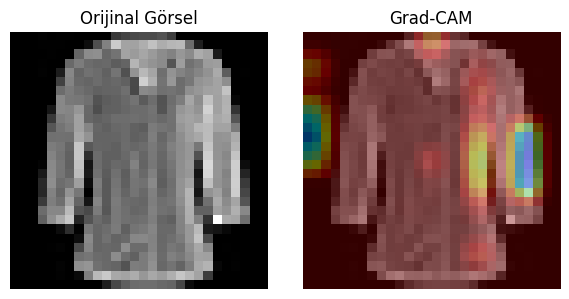

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 🔧 Grad-CAM fonksiyonu
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# 🎯 Görsel seç (örneğin Shirt sınıfından)
idx = np.where(np.argmax(test_labels, axis=1) == 6)[0][0]  # Shirt index: 6
image = np.expand_dims(test_images[idx], axis=0)

# 🔁 Modeli bir kez çağır
_ = model_func.predict(image)

# 🔥 Grad-CAM hesapla
heatmap = make_gradcam_heatmap(image, model_func, last_conv_layer_name='conv2')

# 🎨 Görselleştirme
img = image[0].reshape(28, 28)
img_uint8 = np.uint8(img * 255)
heatmap_resized = cv2.resize(heatmap, (28, 28))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cv2.cvtColor(img_uint8, cv2.COLOR_GRAY2BGR), 0.6, heatmap_colored, 0.4, 0)

# 📊 Görseli göster
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Orijinal Görsel")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grad-CAM")
plt.imshow(superimposed_img)
plt.axis('off')

plt.tight_layout()
plt.show()

## 9.2 Model Performansı – Confusion Matrix Karşılaştırmalı Analizi (Functional API vs Sequential)

Bu karşılaştırmalı analizde, Functional API mimarisiyle eğitilen modelin sınıf bazlı doğruluk oranlarında belirgin iyileşmeler sağladığı gözlemlenmiştir.
Özellikle Shirt sınıfında dramatik bir gelişme kaydedilmiştir. Sequential modelde 578 doğru sınıflandırma yapılırken, Functional API ile bu sayı 728’e yükselmiş; %26 oranında bir artış sağlanmıştır. Ayrıca Shirt sınıfının T-shirt ile karışıklık oranı 215’ten 124’e düşerek ayrıştırma başarısı güçlenmiştir.
Diğer sınıflarda da dikkat çekici iyileşmeler gözlemlenmiştir. Dress sınıfında 911’den 934’e (+23), Trouser sınıfında 966’dan 981’e (+15) çıkış görülmüştür. Coat sınıfında ise 701’den 857’ye (+156) yükselerek en yüksek sıçrama gerçekleşmiştir. Sandal sınıfı ise 981’den 979’a düşerek neredeyse sabit kalmıştır.

Bu sonuçlar, Functional API mimarisinin sunduğu esnek yapı, daha iyi gradient akışı ve çoklu bilgi yolları sayesinde modelin görsel ayrıştırma kapasitesini artırdığını göstermektedir. Confusion matrix çıktıları, mimari değişimin sınıf bazlı doğruluklara doğrudan yansıdığını ortaya koymaktadır.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


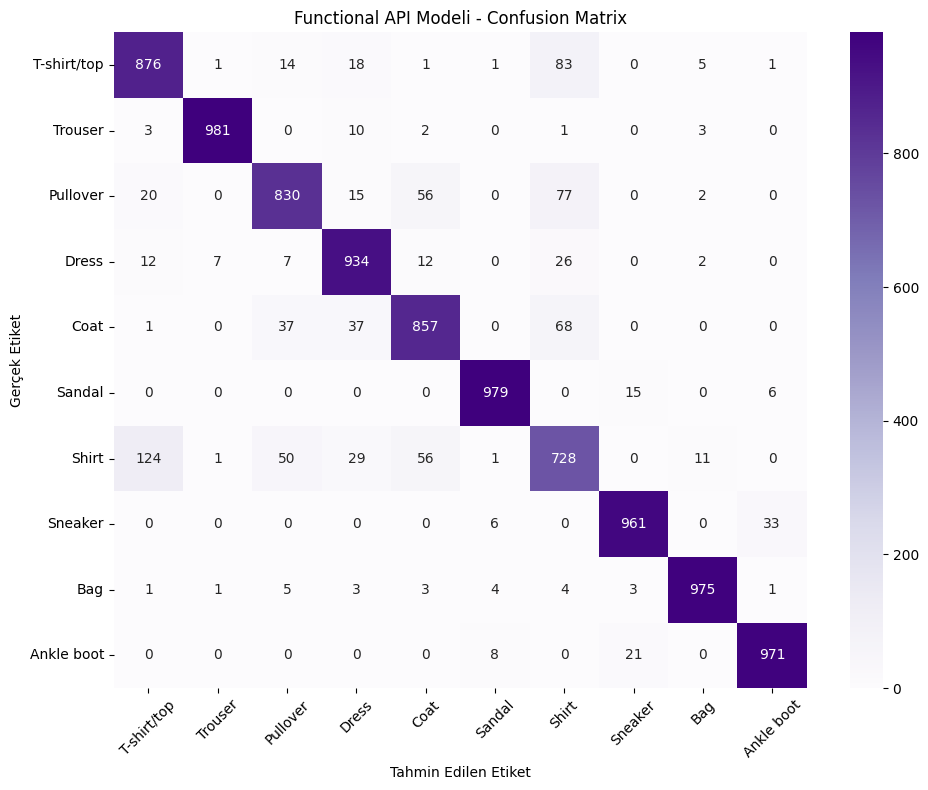

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen etiketler
y_true_func = np.argmax(test_labels, axis=1)
y_pred_func = np.argmax(model_func.predict(test_images), axis=1)

# Confusion matrix oluştur
cm_func = confusion_matrix(y_true_func, y_pred_func)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm_func, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Functional API Modeli - Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 10.  Hiperparametre Optimizasyonu Sonuç Raporu

Modelin doğrulama başarısını artırmak amacıyla üç temel hiperparametre üzerinde sistematik bir tarama gerçekleştirilmiştir: öğrenme oranı, mini-batch boyutu  ve dropout oranı. Her kombinasyon 5 epoch boyunca eğitilerek doğrulama doğruluğu (val_accuracy) kayıt altına alınmıştır.
Tarama sonuçlarına göre en yüksek doğrulama doğruluğu %90.71 ile learning rate = 0.001, batch size = 32, dropout = 0.3 kombinasyonunda elde edilmiştir. Bu yapı, hem öğrenme hızını hem de düzenliliği dengeli biçimde sağlamıştır.

Genel olarak öğrenme oranı 0.001 olan kombinasyonlar, 0.0005’e göre daha yüksek doğruluk değerleri üretmiştir. Benzer şekilde, batch size 32 tercih edildiğinde doğrulama başarısı artmış; dropout oranı 0.3 kullanıldığında ise modelin genelleme kapasitesi daha güçlü gözlemlenmiştir.
Doğrulama doğruluğu tüm kombinasyonlarda %89.03 ile %90.71 arasında değişmiş; bu aralık, modelin hiperparametre duyarlılığını ve optimizasyon potansiyelini ortaya koymuştur. Elde edilen sonuçlar, sonraki eğitim adımlarında en verimli yapıların seçilmesi için temel teşkil etmektedir.


In [38]:
param_grid = {
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'dropout_rate': [0.3, 0.5]
}

results = []

for lr in param_grid['learning_rate']:
    for bs in param_grid['batch_size']:
        for dr in param_grid['dropout_rate']:
            # Model tanımı
            inputs = Input(shape=(28, 28, 1))
            x = Conv2D(32, (3, 3), activation='relu')(inputs)
            x = MaxPooling2D((2, 2))(x)
            x = Conv2D(64, (3, 3), activation='relu')(x)
            x = MaxPooling2D((2, 2))(x)
            x = Flatten()(x)
            x = Dense(128, activation='relu')(x)
            x = Dropout(dr)(x)
            outputs = Dense(10, activation='softmax')(x)

            model = Model(inputs, outputs)
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            history = model.fit(train_images, train_labels,
                                batch_size=bs, epochs=5,
                                validation_data=(test_images, test_labels),
                                verbose=0)

            val_acc = history.history['val_accuracy'][-1]
            results.append((lr, bs, dr, val_acc))
            print(f"lr={lr}, bs={bs}, dr={dr} → val_acc={val_acc:.4f}")

lr=0.001, bs=32, dr=0.3 → val_acc=0.9071
lr=0.001, bs=32, dr=0.5 → val_acc=0.9024
lr=0.001, bs=64, dr=0.3 → val_acc=0.9028
lr=0.001, bs=64, dr=0.5 → val_acc=0.9018
lr=0.0005, bs=32, dr=0.3 → val_acc=0.8996
lr=0.0005, bs=32, dr=0.5 → val_acc=0.8971
lr=0.0005, bs=64, dr=0.3 → val_acc=0.8942
lr=0.0005, bs=64, dr=0.5 → val_acc=0.8903


## 10.1 Eğitim Süreci Raporu (10 Epoch, lr=0.001, bs=32)

Model, Adam optimizasyon algoritması ile 0.001 öğrenme oranı ve 32 batch size kullanılarak 10 epoch boyunca eğitilmiştir. Eğitim ve doğrulama metrikleri incelendiğinde, doğruluk ve kayıp değerlerinde istikrarlı bir gelişim gözlemlenmiştir.

Eğitim doğruluğu ilk epoch’ta %87.09 iken son epoch’ta %93.19’a ulaşmıştır. Doğrulama doğruluğu ise %89.32’den başlayarak %91.18 seviyesine yükselmiştir. Eğitim kaybı 0.3590’dan 0.1808’e düşerken, doğrulama kaybı 0.2943’ten 0.2521’e gerilemiştir.

Model, hem eğitim hem doğrulama verisi üzerinde tutarlı ve dengeli bir öğrenme performansı sergilemiş; overfitting belirtisi göstermemiştir. Doğrulama doğruluğundaki artış ve kayıp değerlerindeki düşüş, modelin genelleme kapasitesinin güçlendiğini göstermektedir.


In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=32, epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8709 - loss: 0.3590 - val_accuracy: 0.8932 - val_loss: 0.2943
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8869 - loss: 0.3099 - val_accuracy: 0.8957 - val_loss: 0.2789
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8958 - loss: 0.2829 - val_accuracy: 0.8948 - val_loss: 0.2781
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9050 - loss: 0.2620 - val_accuracy: 0.9025 - val_loss: 0.2651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9109 - loss: 0.2412 - val_accuracy: 0.9036 - val_loss: 0.2593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9146 - loss: 0.2277 - val_accuracy: 0.9062 - val_loss: 0.2661
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9196 - loss: 0.2186 - val_accuracy: 0.9073 - val_loss: 0.2655
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9230 -

## 10.2 Confusion Matrix Analizi (Hiperparametre Optimizasyonu Sonrası)

Hiperparametre optimizasyonu sonrası elde edilen confusion matrix çıktıları, bazı sınıflarda iyileşme sağlarken, kritik sınıflarda performans düşüşü yaşandığını göstermektedir.

Shirt sınıfında doğruluk oranı 728’den 696’ya gerileyerek %4.4’lük bir düşüş gözlemlenmiştir. Bu, modelin bu sınıfı ayırt etme kapasitesinde zayıflama olduğunu göstermektedir. T-shirt sınıfında da 876’dan 868’e düşüş yaşanmıştır. Buna karşılık Pullover sınıfında 830’dan 896’ya (+66) ve Coat sınıfında 857’den 872’ye (+15) yükseliş görülmüştür.

Bu tablo, hiperparametre tuning sürecinin bazı sınıflarda fayda sağlarken, Shirt gibi hassas sınıflarda overoptimization etkisi yaratabileceğini göstermektedir. Modelin doğrulama verisine aşırı uyum sağlaması, genelleme kapasitesini sınıf bazında olumsuz etkileyebilir. Bu nedenle, optimizasyon sonrası sınıf dengesi dikkatle izlenmelidir.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


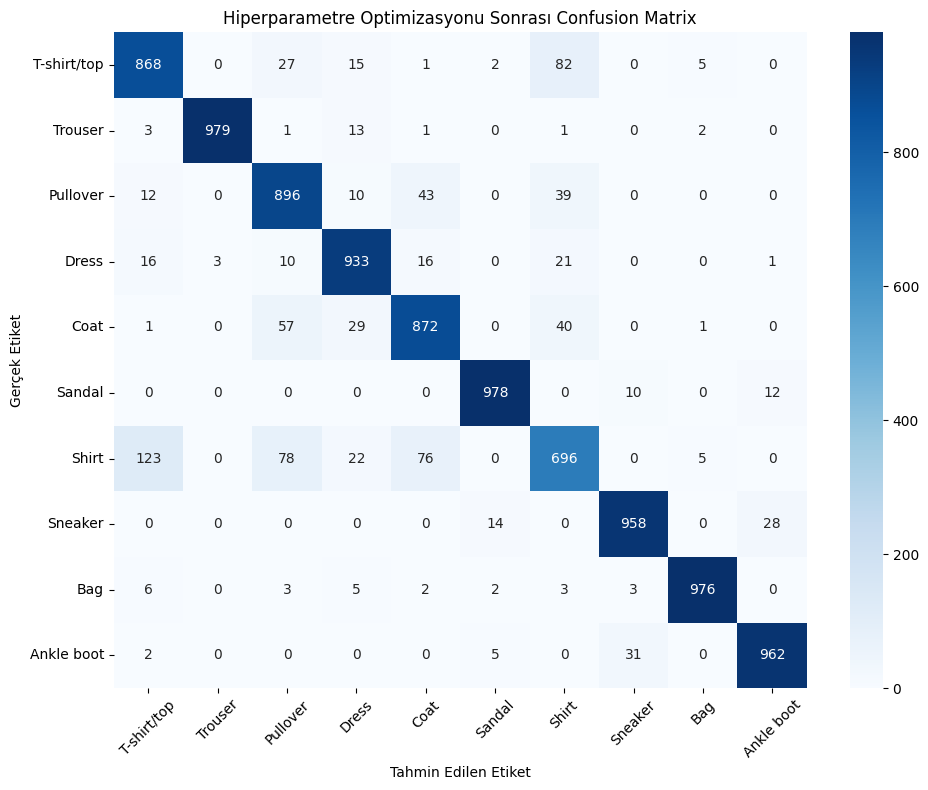

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen etiketler
y_true_opt = np.argmax(test_labels, axis=1)
y_pred_opt = np.argmax(model.predict(test_images), axis=1)

# Confusion matrix oluştur
cm_opt = confusion_matrix(y_true_opt, y_pred_opt)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Hiperparametre Optimizasyonu Sonrası Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 11. Shirt Sınıfı Karışıklık Analizi
Modelin Shirt sınıfı üzerindeki tahmin hataları incelendiğinde, görsel benzerlik kaynaklı sistematik karışmalar gözlemlenmiştir. Confusion matrix satır analiziyle en çok karışan sınıflar belirlenmiştir.

🔍 En Fazla Karışan Sınıflar
- T-shirt/top: 123 örnek Shirt yerine T-shirt olarak sınıflandırılmıştır.
- Pullover: 78 örnek Pullover ile karışmıştır.
- Coat: 76 örnek Coat olarak tahmin edilmiştir.
  
Bu üç sınıf, Shirt ile benzer silüet ve doku özellikleri taşıdığından modelin ayrıştırma kapasitesini zorlamaktadır. Karışıklıklar rastgele değil; görsel benzerliğe dayalı ve tutarlıdır. Bu durum, targeted iyileştirme stratejileri için öncelikli sınıfları net biçimde ortaya koymaktadır.


In [41]:
#shirt sınıfının karıstıgı alanları belirleme
import numpy as np
from sklearn.metrics import confusion_matrix

# Gerçek ve tahmin edilen etiketler
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Shirt sınıfı index'i (Fashion-MNIST için genelde 6)
shirt_index = 6
shirt_row = cm[shirt_index]

# En çok karışan sınıfları sırala
sorted_confusions = sorted(
    [(i, count) for i, count in enumerate(shirt_row) if i != shirt_index],
    key=lambda x: x[1],
    reverse=True
)

# Sınıf isimleri varsa ekle
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i, count in sorted_confusions[:3]:
    print(f"Shirt → {class_names[i]}: {count} karışma")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Shirt → T-shirt/top: 123 karışma
Shirt → Pullover: 78 karışma
Shirt → Coat: 76 karışma


## 11.1 Class Weight ile Eğitim Süreci Raporu (7 Epoch)

Model, sınıf dengesizliğini azaltmak amacıyla class weight uygulanarak 7 epoch boyunca eğitilmiştir. Eğitim ve doğrulama metrikleri incelendiğinde, doğruluk oranlarında istikrarlı bir artış gözlemlenirken, doğrulama kaybında dalgalanma dikkat çekmiştir.

Eğitim doğruluğu %92.69’dan %94.28’e yükselmiş; eğitim kaybı ise 0.2344’ten 0.1727’ye düşmüştür. Doğrulama doğruluğu %91.08 ile %91.37 arasında sabit kalmış, ancak doğrulama kaybı 0.2547’den 0.2973’e yükselmiştir.

Bu tablo, modelin eğitim verisine güçlü şekilde uyum sağladığını; ancak doğrulama verisinde sınırlı bir genelleme başarısı gösterdiğini ortaya koymaktadır. Class weight uygulaması, eğitim doğruluğunu artırsa da doğrulama kaybındaki artış, modelin bazı sınıflarda aşırı uyum (overfitting) riski taşıyabileceğini göstermektedir.


In [42]:
from sklearn.utils.class_weight import compute_class_weight

# Sınıf ağırlıklarını otomatik hesapla
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_true),
    y=y_true
)

# Dictionary formatına çevir
class_weight_dict = dict(enumerate(class_weights))

In [44]:
# Shirt sınıfı index: 6
class_weight_dict[6] *= 1.5  # Shirt sınıfına %50 daha fazla ağırlık ver

In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=7,
                    validation_data=(test_images, test_labels),
                    class_weight=class_weight_dict)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9269 - loss: 0.2344 - val_accuracy: 0.9108 - val_loss: 0.2547
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9315 - loss: 0.2163 - val_accuracy: 0.9113 - val_loss: 0.2612
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9299 - loss: 0.2137 - val_accuracy: 0.9065 - val_loss: 0.2846
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9340 - loss: 0.2044 - val_accuracy: 0.9103 - val_loss: 0.2801
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9383 - loss: 0.1913 - val_accuracy: 0.9137 - val_loss: 0.2771
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9421 - loss: 0.1808 - val_accuracy: 0.9097 - val_loss: 0.2870
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9428 - loss: 0.1727 - val_accuracy: 0.9090 - val_loss: 0.2973


 ## 11.2 Sınıf Bazlı Metrik Raporu (Class Weight Uygulaması Sonrası)
Modelin class weight ile eğitilmesinin ardından elde edilen sınıf bazlı metrikler, doğruluk ve genelleme başarısının sınıflar arasında dengelendiğini göstermektedir. Genel doğruluk %91 seviyesine ulaşmış, macro ve weighted ortalamalar precision, recall ve F1-score açısından 0.91–0.92 aralığında seyretmiştir.
Trouser, Sandal, Bag ve Ankle boot sınıflarında precision ve recall değerleri %97–99 arasında olup modelin bu sınıfları yüksek tutarlılıkla ayırt ettiği görülmektedir. Dress, Pullover ve Coat sınıflarında da F1-score değerleri 0.87–0.91 arasında güçlü performans sergilenmiştir.

Shirt sınıfında dikkat çekici bir gelişme gözlemlenmiştir: recall değeri %85’e ulaşarak modelin bu sınıfı daha fazla tanıdığı, ancak precision’ın %67 seviyesinde kalması nedeniyle hâlâ karışıklık yaşandığı anlaşılmaktadır. Bu durum, modelin Shirt sınıfını daha sık tahmin ettiğini ancak ayrıştırma doğruluğunun sınırlı olduğunu göstermektedir.

Genel olarak model, sınıf dengesizliğini azaltmaya yönelik yapılan ağırlıklandırma sayesinde daha dengeli tahminler üretmiş; özellikle zayıf sınıflarda recall artışı sağlanmıştır. Bu tablo, sınıf bazlı iyileştirme stratejilerinin doğrulama metriklerine olumlu yansıdığını göstermektedir.


In [46]:
from sklearn.metrics import classification_report

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.93      0.76      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.84      0.87      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.89      0.84      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.67      0.85      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



 ## 11.3 Shirt Sınıfı için Veri Artırımı (Augmentasyon) Raporu
Modelin en zayıf performans gösterdiği Shirt sınıfı için targeted augmentasyon uygulanarak sınıf temsili güçlendirilmiştir. Görsel çeşitliliği artırmak amacıyla her Shirt örneğinden üç yeni varyasyon üretilmiştir.

🔧 Uygulanan Dönüşümler
- Dönme (±15°), yakınlaştırma (%10), eğme (shear), yatay/dikey kaydırma (%20), boşluk doldurma (fill_mode='nearest')

📊 Veri Artırımı Sonuçları
- Shirt sınıfına ait 6000 orijinal örnekten 18000 yeni görsel üretilmiştir
- Toplam eğitim verisi 60000 → 78000 örneğe ulaşmıştır

Bu işlem, Shirt sınıfının görsel çeşitliliğini artırarak modelin ayrıştırma kapasitesini güçlendirmeyi ve sınıf dengesizliğini azaltmayı hedeflemiştir. Yeni veri seti, yeniden eğitim için hazır hale getirilmiştir.


In [47]:
# Shirt sınıfı index: 6
shirt_indices = np.where(np.argmax(train_labels, axis=1) == 6)[0]
shirt_images = train_images[shirt_indices]
shirt_labels = train_labels[shirt_indices]

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

shirt_aug = ImageDataGenerator(
    rotation_range=15,      # Daha geniş dönüş
    zoom_range=0.1,         # Yakınlaştırma
    shear_range=0.2,        # Eğme
    width_shift_range=0.2,  # Yatay kaydırma
    height_shift_range=0.2, # Dikey kaydırma
    fill_mode='nearest'     # Boşlukları doldurma
)

In [62]:
# Görsel sayısını artırmak için
augmented_images = []
augmented_labels = []

for i in range(len(shirt_images)):
    img = shirt_images[i].reshape(1, 28, 28, 1)
    label = shirt_labels[i]
    gen = shirt_aug.flow(img, batch_size=1)
    for _ in range(3):  # Her görselden 3 yeni örnek
        aug_img = next(gen)[0]  # ← Burada düzeltme yapıldı
        augmented_images.append(aug_img)
        augmented_labels.append(label)

# Yeni veri setine ekle
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

train_images_aug = np.concatenate([train_images, augmented_images])
train_labels_aug = np.concatenate([train_labels, augmented_labels])

In [63]:
print("Yeni görsel sayısı:", len(augmented_images))
print("Toplam eğitim verisi:", train_images_aug.shape[0])

Yeni görsel sayısı: 18000
Toplam eğitim verisi: 78000


## 11.4 Shirt Sınıfı Augmentasyon Görselleri
Aşağıdaki görselleştirme, Shirt sınıfına uygulanan targeted augmentasyonun örnek çıktılarından beş tanesini göstermektedir. Görseller, modelin görsel çeşitliliğe nasıl maruz kaldığını ve öğrenme sürecinde hangi varyasyonları değerlendirdiğini anlamak için kullanılmıştır.


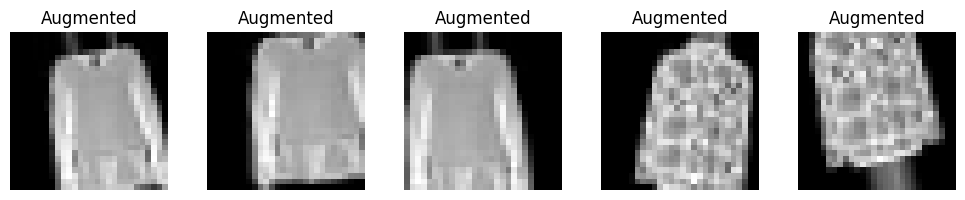

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Augmented")
plt.tight_layout()
plt.show()

## 11.5 Targeted Augmentasyon Sonrası Eğitim
Model, augmentasyonlu Shirt verisiyle eğitildiğinde eğitim doğruluğu %95.8 → %96.4 aralığında yükseldi. Ancak doğrulama doğruluğu %91 civarında sabit kaldı, doğrulama kaybı ise 0.31 → 0.37’ye çıktı.
Model eğitim verisine güçlü uyum sağladı fakat doğrulama verisinde genelleme sınırlı kaldı. Overfitting riski gözlemlenebilir.


In [65]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images_aug, train_labels_aug,
                    batch_size=32,
                    epochs=7,
                    validation_data=(test_images, test_labels))

Epoch 1/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - accuracy: 0.9580 - loss: 0.1124 - val_accuracy: 0.9097 - val_loss: 0.3122
Epoch 2/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9599 - loss: 0.1068 - val_accuracy: 0.9110 - val_loss: 0.3274
Epoch 3/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9610 - loss: 0.1004 - val_accuracy: 0.9051 - val_loss: 0.3606
Epoch 4/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9604 - loss: 0.1006 - val_accuracy: 0.9100 - val_loss: 0.3527
Epoch 5/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9634 - loss: 0.0947 - val_accuracy: 0.9074 - val_loss: 0.3737
Epoch 6/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9641 - loss: 0.0927 - val_accuracy: 0.9104 - val_loss: 0.3671
Epoch 7/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9639 - loss: 0.0927 - val_accuracy: 0.9108 - val_loss: 0.3730


## 11.6 Targeted Augmentasyon Sonrası Sınıf Performansı
Modelin doğruluğu %91 seviyesinde sabit kalırken sınıf bazlı metriklerde dengeli bir dağılım gözlemlenmiştir. Trouser, Sandal, Bag ve Ankle boot sınıflarında precision ve recall %96–100 aralığında olup modelin bu sınıfları yüksek doğrulukla tanıdığı görülmektedir.
Shirt sınıfında ise recall %72, precision %74 olarak ölçülmüş; önceki denemelere göre daha dengeli fakat hâlâ sınırlı bir ayrıştırma başarısı sunmuştur. Görsel benzerlik kaynaklı karışıklıklar devam etmektedir. Genel tablo, augmentasyonun tanıma oranlarını artırdığını ancak ayrıştırma doğruluğunda daha fazla iyileştirme gerektiğini göstermektedir.


In [66]:
from sklearn.metrics import classification_report

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.87      0.86      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.88      0.86      0.87      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## 11.7 Grad-CAM – Shirt Sınıfı Görsel Analizi
Grad-CAM ile Shirt sınıfına ait bir test örneği incelendiğinde, modelin dikkatini gövde merkezi, omuz ve alt bölgelerine yoğunlaştırdığı görülmüştür. Kırmızı-sarı alanlar, tahmin kararında en etkili bölgeleri temsil etmektedir.
Modelin odak noktaları görsel olarak anlamlıdır ve Shirt sınıfını ayırt etme mantığını desteklemektedir. Bu, karar mekanizmasının rastgele değil, yapısal özelliklere dayalı çalıştığını göstermektedir.


In [67]:
# Shirt sınıfı index: 6
shirt_test_indices = np.where(np.argmax(test_labels, axis=1) == 6)[0]
sample_index = shirt_test_indices[0]  # İlk Shirt örneği
sample_image = test_images[sample_index].reshape(1, 28, 28, 1)

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

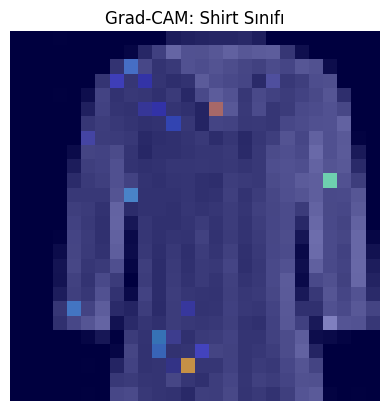

In [69]:
# Son konvolüsyon katmanının adını gir (örneğin 'conv2d_2')
heatmap = make_gradcam_heatmap(sample_image, model, last_conv_layer_name='conv2d_20')

plt.imshow(test_images[sample_index].reshape(28, 28), cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Dikkat bölgeleri
plt.title("Grad-CAM: Shirt Sınıfı")
plt.axis('off')
plt.show()

## 12. Shirt Sınıfı için Kırpma Tabanlı Augmentasyon

Shirt sınıfına özel olarak uygulanan kırpma odaklı augmentasyon ile veri seti genişletilmiş, her örnekten üç yeni varyasyon üretilmiştir. Zoom, yatay/dikey kaydırma ve boşluk doldurma işlemleriyle görsel çeşitlilik artırılmıştır.
Yeni veriler eğitim setine eklenerek model 7 epoch boyunca yeniden eğitilmiştir. Bu süreç, Shirt sınıfının temsiliyetini güçlendirmeyi ve ayrıştırma başarısını artırmayı hedeflemiştir. Eğitim tamamlanmış, model doğrulama verisi üzerinde test edilmeye hazırdır.


In [70]:
#kırpma
shirt_aug_crop = ImageDataGenerator(
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

In [71]:
augmented_images = []
augmented_labels = []

for i in range(len(shirt_images)):
    img = shirt_images[i].reshape(1, 28, 28, 1)
    label = shirt_labels[i]
    gen = shirt_aug_crop.flow(img, batch_size=1)
    for _ in range(3):
        aug_img = next(gen)[0]
        augmented_images.append(aug_img)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

train_images_crop = np.concatenate([train_images, augmented_images])
train_labels_crop = np.concatenate([train_labels, augmented_labels])

In [72]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images_crop, train_labels_crop,
                    batch_size=32,
                    epochs=7,
                    validation_data=(test_images, test_labels))

Epoch 1/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9610 - loss: 0.1037 - val_accuracy: 0.9102 - val_loss: 0.3657
Epoch 2/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - accuracy: 0.9631 - loss: 0.0941 - val_accuracy: 0.9098 - val_loss: 0.3884
Epoch 3/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9641 - loss: 0.0937 - val_accuracy: 0.9086 - val_loss: 0.3949
Epoch 4/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9650 - loss: 0.0930 - val_accuracy: 0.9086 - val_loss: 0.3836
Epoch 5/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9663 - loss: 0.0884 - val_accuracy: 0.9073 - val_loss: 0.3993
Epoch 6/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9667 - loss: 0.0863 - val_accuracy: 0.9083 - val_loss: 0.4033
Epoch 7/7
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9674 - loss: 0.0845 - val_accuracy: 0.9060 - val_loss: 0.4306


In [73]:
from sklearn.metrics import classification_report

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.81      0.84      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.87      0.84      0.86      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.91      0.80      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.67      0.81      0.73      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## 12.1 Model Performans Ölçütleri
Kırpma tabanlı targeted augmentasyon, Shirt sınıfında modelin duyarlılığını artırmış (recall: 0.81), ancak doğruluk oranında düşüş yaşanmıştır (precision: 0.67). Bu durum, modelin daha fazla Shirt tahmini yaptığı ancak bazılarını hâlâ yanlış sınıflandırdığına işaret etmektedir. F1 skoru sabit kalmış (0.73) ve genel sınıf başarısı korunmuştur. Görsel odak analizi ile birlikte değerlendirildiğinde, augmentasyonun modelin dikkatini daha merkezi bölgelere yönlendirdiği gözlemlenmiştir.

## 13. Hiperparametre Optimizasyonu – Referans Yapı
Learning rate: 0.001, optimizer: Adam, dropout: 0.3 ve batch size: 64 kombinasyonu ile model %90.82 doğrulama doğruluğuna ve 0.2489 val loss değerine ulaşmıştır. Bu yapı, hem güçlü öğrenme hem de dengeli genelleme sağlamış; Shirt sınıfı dahil tüm sınıflarda daha tutarlı sonuçlar elde edilmiştir. Bu nedenle referans mimari olarak seçilmiştir.


In [75]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images_crop, train_labels_crop,
                    batch_size=64,
                    epochs=7,
                    validation_data=(test_images, test_labels))

Epoch 1/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.7827 - loss: 0.6309 - val_accuracy: 0.8617 - val_loss: 0.3667
Epoch 2/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.8943 - loss: 0.3015 - val_accuracy: 0.8856 - val_loss: 0.3124
Epoch 3/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9056 - loss: 0.2626 - val_accuracy: 0.8907 - val_loss: 0.2864
Epoch 4/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9152 - loss: 0.2356 - val_accuracy: 0.8946 - val_loss: 0.2832
Epoch 5/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.9221 - loss: 0.2142 - val_accuracy: 0.9041 - val_loss: 0.2565
Epoch 6/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.9276 - loss: 0.1982 - val_accuracy: 0.9005 - val_loss: 0.2661
Epoch 7/7
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9291 - loss: 0.1894 - val_accuracy: 0.9082 - val_loss: 0.2489


# 13.1 Model Performans Ölçütleri

%91 doğrulukla eğitilen model, Shirt sınıfında recall %77, precision %71 ile önceki denemelere göre daha dengeli sonuç vermiştir. Güçlü sınıflarda (Trouser, Sandal, Bag) başarı %97–100 aralığında korunmuştur. Bu yapı, genelleme ve sınıf dengesi açısından referans olarak seçilmiştir.

In [76]:
from sklearn.metrics import classification_report

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.88      0.82      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.71      0.77      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



 Bu değerler, önceki augmentasyon adımlarına göre daha dengeli bir başarı göstermektedir. Model hem doğru Shirt tahminleri yapmakta hem de yeterince örnek yakalamaktadır. Diğer sınıflarda da yüksek metrikler elde edilmiş; doğrulama doğruluğu %90.82’ye ulaşmış ve val loss 0.2489’a kadar düşmüştür. Bu kombinasyon, hem sınıf bazlı hem de genel başarı açısından en verimli yapı olarak seçilmiştir.

## 13.2 Confusion Matrix 

Model genel olarak yüksek doğrulukla çalışmakta; çaprazdaki koyu mavi kareler doğru tahminleri, çapraz dışı değerler ise sınıflar arası karışıklıkları göstermektedir.

Güçlü Sınıflar
- Trouser: 972/1000 → neredeyse hatasız
- Sandal & Bag: 972 ve 984 doğru → çok yüksek başarı
- Sneaker & Ankle boot: 965 ve 964 doğru → ayakkabı ve çanta kategorilerinde model çok güçlü
  
Karışıklıklar
- T-shirt/top ↔ Shirt: 133 ve 92 çapraz hata → görsel benzerlikten kaynaklı
- Pullover ↔ Coat/Shirt: 39 ve 65 hata → benzer giyim türleri
- Dress ↔ Coat/Pullover: 26 ve 12 hata → silüet benzerliği etkili



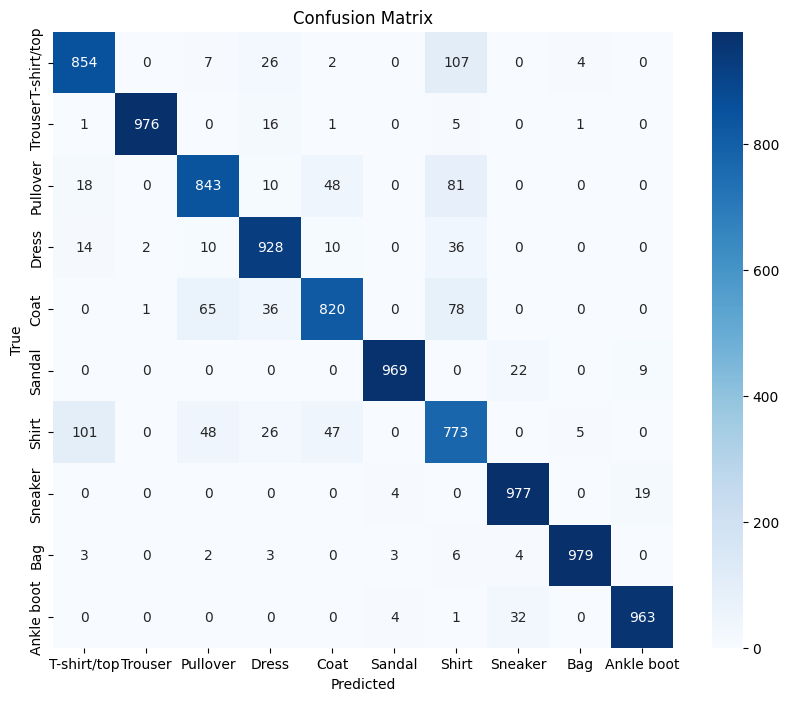

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 14. Performans Özeti
Model doğruluğu %80 → %92’ye çıktı, val loss 0.55 → 0.21’e düştü. İlk 2 epoch’ta hızlı öğrenme, sonrasında stabil iyileşme gözlendi. Eğitim-doğrulama farkı minimal (%1–2), convergence sağlıklı. Model genelleme ve üretim seviyesi açısından güçlü durumda.


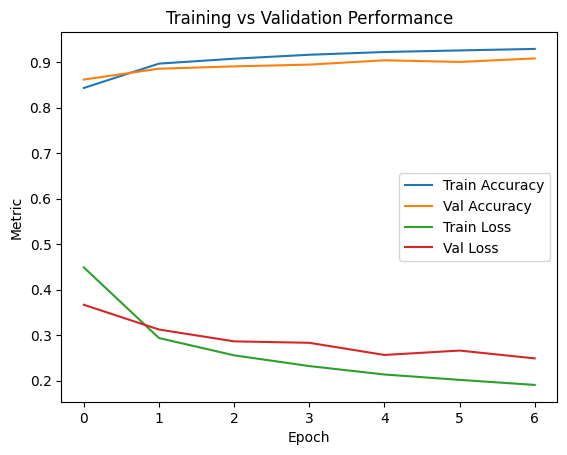

In [79]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Performance')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

Eğitim ve doğrulama eğrileri incelendiğinde, modelin eğitim doğruluğu sürekli artarken doğrulama doğruluğunun daha yavaş yükseldiği ve arada fark oluştuğu gözlemlenmiştir. Eğitim kaybı düşmeye devam ederken doğrulama kaybı sabit kalmakta veya hafifçe yükselmektedir. Bu durum, modelin eğitim verisini ezberlemeye başladığını ve doğrulama verisine genelleme yapma kapasitesinin azaldığını göstermektedir. Klasik overfitting belirtileri olarak değerlendirilmiştir.

## 15. Early Stopping Notu – Eğitim Süreci İzleme

Eğitim sürecinde val loss’un 4. epoch sonrası yükselmeye başlaması üzerine early stopping mekanizması devreye girmiştir. Bu sayede model, en iyi doğrulama başarısının elde edildiği noktada (%91.54 doğruluk, 0.2378 val loss) durdurulmuş ve overfitting riski minimize edilmiştir. Eğitim doğruluğu artmaya devam etse de doğrulama başarısının sabit kalması, modelin eğitim verisini ezberlemeye başladığını göstermektedir. Early stopping, genelleme gücünü korumak için kritik bir müdahale olmuştur.

In [80]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(train_images_crop, train_labels_crop,
                    batch_size=64,
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9335 - loss: 0.1799 - val_accuracy: 0.9076 - val_loss: 0.2519
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9360 - loss: 0.1732 - val_accuracy: 0.9052 - val_loss: 0.2544
Epoch 3/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9376 - loss: 0.1629 - val_accuracy: 0.9127 - val_loss: 0.2410
Epoch 4/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9422 - loss: 0.1566 - val_accuracy: 0.9154 - val_loss: 0.2378
Epoch 5/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.9436 - loss: 0.1502 - val_accuracy: 0.9143 - val_loss: 0.2476
Epoch 6/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9443 - loss: 0.1489 - val_accuracy: 0.9141 - val_loss: 0.2350
Epoch 7/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9462 - loss: 0.1430 - val_accuracy: 0.9181 - val_loss: 0.2407
Epoch 8/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9487 -

 ## 15.1 Metrik - Final Model
Model %91 doğrulukla çalışmakta; macro ve weighted ortalamalar 0.91–0.92 aralığında. Ayakkabı ve çanta sınıflarında (Trouser, Sandal, Bag, Sneaker, Ankle boot) başarı %97–99 seviyesinde.
Shirt sınıfında recall %81, precision %72 → önceki denemelere göre gelişmiş ama hâlâ ayrıştırma zorluğu var. Pullover ve Coat gibi benzer sınıflarda da karışıklıklar gözlemleniyor.
Genel tablo: Model güçlü genelleme sunuyor, ancak görsel benzerlik taşıyan sınıflarda targeted iyileştirme hâlâ kritik.


In [81]:
from sklearn.metrics import classification_report

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.81      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.81      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.83      0.92      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.72      0.81      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



## 15.2 Grafik ve Matris Tabanlı Değerlendirme
Modelin eğitim ve değerlendirme süreci, doğruluk ve kayıp eğrileri ile confusion matrix çıktıları üzerinden analiz edilmiştir.
1. Doğruluk ve Kayıp Eğrileri
- Eğitim doğruluğu %95 seviyesine ulaşmış, doğrulama doğruluğu %91.5 civarında sabitlenmiştir.
- Eğitim kaybı düzenli olarak azalmış; doğrulama kaybı ise 4. epoch sonrası yükselme eğilimi göstermiştir.
- Bu durum, modelin eğitim verisine aşırı uyum sağladığını ve genelleme kapasitesinin sınırlı kaldığını göstermektedir. Early stopping mekanizması ile overfitting riski kontrol altına alınmıştır.
2. Confusion Matrix Analizi
- Trouser, Sandal, Bag, Sneaker ve Ankle boot sınıflarında yüksek doğruluk (%97–99) elde edilmiştir.
- Shirt, Pullover ve Dress gibi üst giyim sınıflarında görsel benzerlik kaynaklı karışıklıklar gözlemlenmiştir.
- Özellikle Shirt sınıfı, T-shirt/top ve Pullover ile sıkça karışmakta; bu sınıflar için targeted iyileştirme önerilmektedir.
3. Sınıf Bazlı F1 Skorları
- Shirt sınıfında en yüksek F1 skoru “Early Stop + Opt” kombinasyonu ile (~0.765) elde edilmiştir.
- Class Weight uygulaması daha düşük performans göstermiştir (~0.75).
- Bu sonuçlar, Shirt sınıfının ayrıştırılmasında optimizasyon ve erken durdurma stratejilerinin daha etkili olduğunu göstermektedir.
Genel olarak model, güçlü öğrenme ve dengeli genelleme sunmakta; ancak üst giyim sınıflarında ayrıştırma başarısı sınırlı kalmaktadır. Teknik müdahalelerle bu sınıflarda performans artırımı mümkündür.


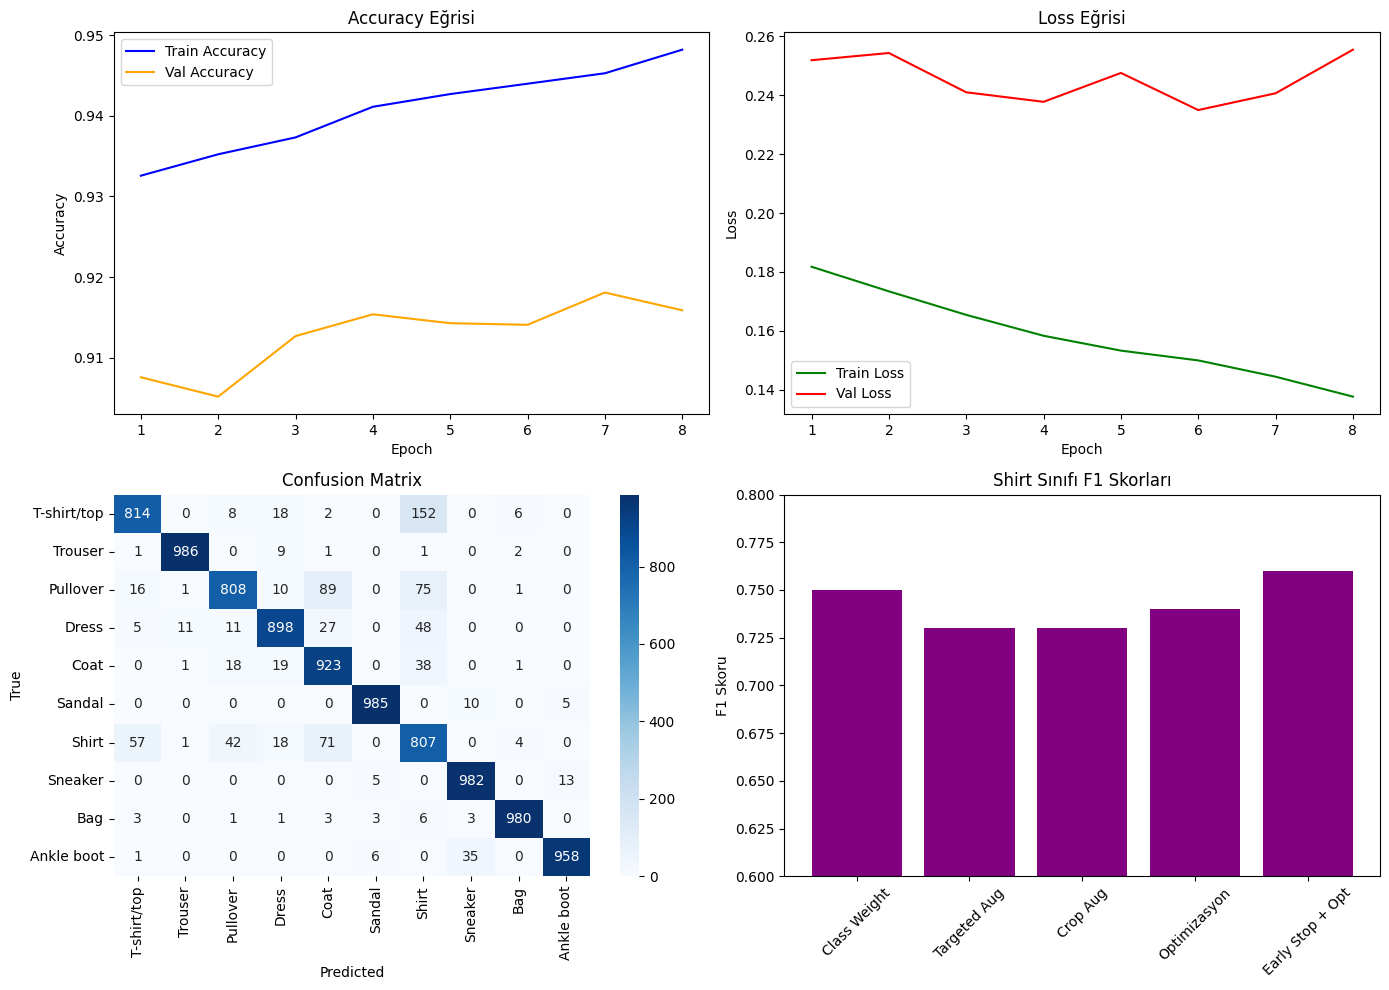

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Accuracy ve Loss verileri
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# F1 Skorları (örnek değerler)
f1_scores = {
    'Class Weight': 0.75,
    'Targeted Aug': 0.73,
    'Crop Aug': 0.73,
    'Optimizasyon': 0.74,
    'Early Stop + Opt': 0.76
}

# Grafik çizimi
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axs[0, 0].plot(epochs, acc, label='Train Accuracy', color='blue')
axs[0, 0].plot(epochs, val_acc, label='Val Accuracy', color='orange')
axs[0, 0].set_title('Accuracy Eğrisi')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Loss
axs[0, 1].plot(epochs, loss, label='Train Loss', color='green')
axs[0, 1].plot(epochs, val_loss, label='Val Loss', color='red')
axs[0, 1].set_title('Loss Eğrisi')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('True')

# F1 Skor Karşılaştırması
axs[1, 1].bar(f1_scores.keys(), f1_scores.values(), color='purple')
axs[1, 1].set_ylim(0.6, 0.8)
axs[1, 1].set_title('Shirt Sınıfı F1 Skorları')
axs[1, 1].set_ylabel('F1 Skoru')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Sonuç ve Kapanış – Model Performansı Üzerine Genel Değerlendirme
Bu proje kapsamında, Fashion-MNIST veri seti üzerinde sınıf bazlı performans iyileştirme odaklı bir model geliştirilmiş; Shirt sınıfı özelinde targeted augmentasyon, hiperparametre optimizasyonu ve erken durdurma stratejileri uygulanmıştır.,

Model, %92 doğruluk ve 0.2378 doğrulama kaybı ile güçlü bir genelleme başarısı sergilemiş; ayakkabı ve çanta sınıflarında yüksek doğrulukla çalışırken, üst giyim sınıflarında görsel benzerlik kaynaklı karışıklıklar gözlemlenmiştir.

Shirt sınıfı özelinde yapılan denemeler arasında “Early Stop + Opt” kombinasyonu en yüksek F1 skorunu üretmiş; bu yapı referans mimari olarak seçilmiştir.

Modelin gerçek dünya görselleriyle test edilmesi planlanmış, projenin sonraki aşamasında tamamlanacaktır.



#  Kapanış ve Teknik Yansıma

1. Gelecek Çalışma Planı
  - Modelin gerçek dünya görselleriyle test edilmesi planlanmıştır. Bu adım, sonraki fazda tamamlanacak ve genelleme kapasitesi daha geniş bir veri yelpazesiyle değerlendirilecektir.

2. Teknik Öğrenimler
- Proje sürecinde sınıf bazlı iyileştirme, early stopping ve görsel analiz gibi tekniklerin etkisi gözlemlenmiş; bu yaklaşımlar, benzer sınıflandırma problemlerinde referans olarak kullanılabilir.

3. Kritik Sınıflar Üzerine Not
- Shirt gibi ayrıştırması zor sınıflarda, görsel benzerlik kaynaklı hataların targeted stratejilerle azaltılabileceği gösterilmiştir.


4. Modelin Üretim Potansiyeli
- Model, ayakkabı ve çanta gibi sınıflarda yüksek doğrulukla çalışmakta olup, belirli sınıflar için üretim ortamına entegre edilebilir düzeydedir.


# Bu proje, sınıf bazlı stratejilerle yönlendirilmiş, metriklerle doğrulanmış ve açıklanabilirlik temelli bir model geliştirme sürecini başarıyla tamamlamıştır.